In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import pandas as pd
import seaborn as sns
from IPython.display import display, Math, Latex

HOME_DIR = os.getcwd()

### Averaged Noisy Workloads
- We generated 10 noisy workloads. And used the average of them as an input to the robust tuning. 
- Robust tuning is the best (lowest cost) out of 100 trials

In [2]:
os.chdir(HOME_DIR)
os.chdir("../experiment_results/averaged_noisy_workload") 
# so they appear in order
files = ['uniform.csv', 'unimodal_1.csv', 'unimodal_2.csv', 'unimodal_3.csv', 'unimodal_4.csv', 
         'bimodal_1.csv', 'bimodal_2.csv', 'bimodal_3.csv', 'bimodal_4.csv', 'bimodal_5.csv', 'bimodal_6.csv',
         'trimodal_1.csv', 'trimodal_2.csv', 'trimodal_3.csv', 'trimodal_4.csv'
        ]

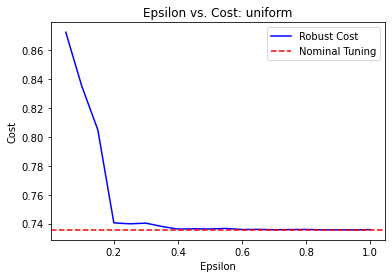

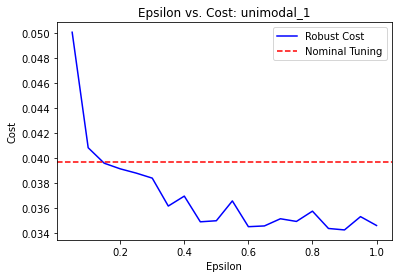

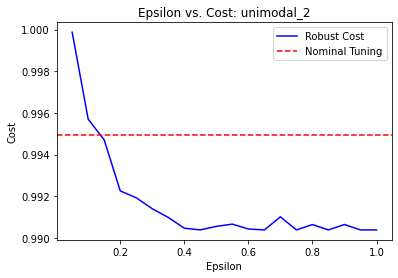

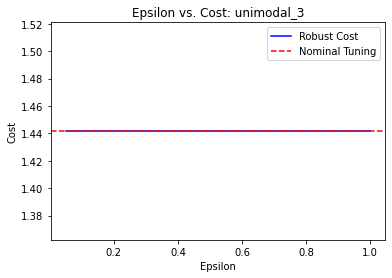

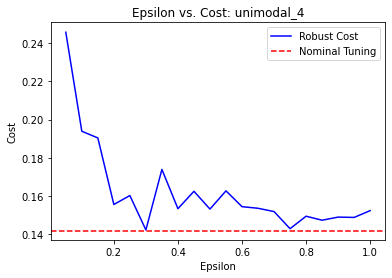

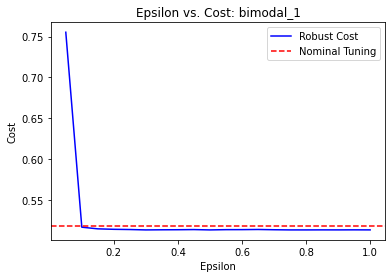

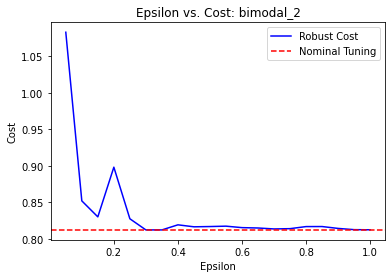

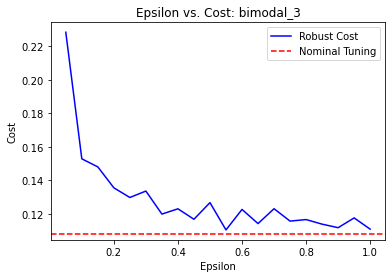

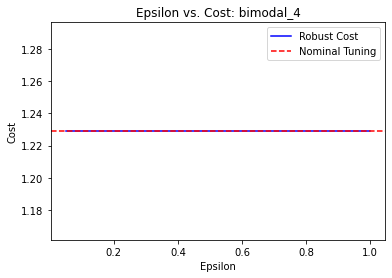

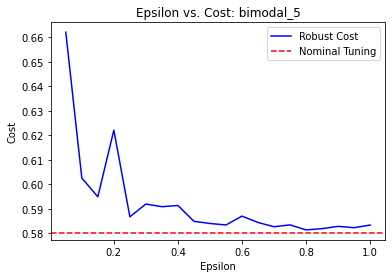

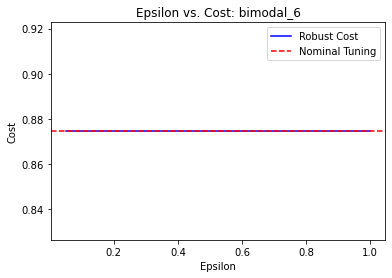

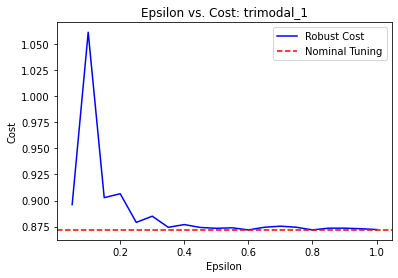

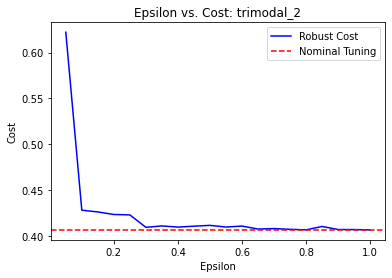

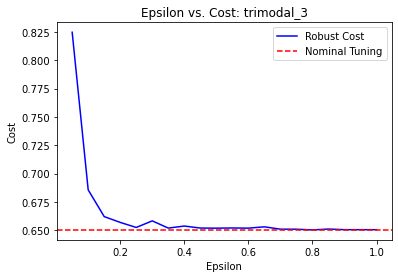

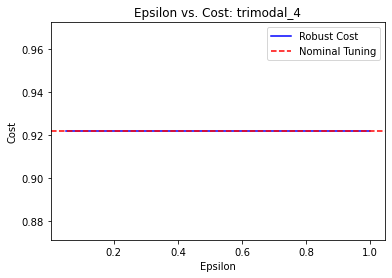

In [3]:
for i in range(len(files)): 
    df = pd.read_csv(files[i])
    df["Robust Cost"] = df["Robust Cost"].round(6)
    plt.plot(df["Epsilon"].to_numpy(), df["Robust Cost"].to_numpy(), color='blue', label="Robust Cost")
    plt.axhline(y=df["Nominal Cost"].iloc[0], color="red", linestyle="--", label="Nominal Tuning")
    plt.xlabel("Epsilon")
    plt.ylabel("Cost")
    plt.legend()
    name = "Epsilon vs. Cost: " + files[i].split(".")[0]
    plt.title(name)
    plt.show()

### Max Expected Rho
- Generate 1 perturbed workload as the input to Endure 
- Generate 10 other perturbed workloads to find the maximum KL distance as the input for Rho 
- Robust tuning is the lowest cost out of 100 + excluding numpy overflows

In [4]:
os.chdir(HOME_DIR)
os.chdir("../experiment_results/max_expected_rho") 
files = ['uniform.csv', 
         'unimodal_1.csv', 'unimodal_2.csv', 'unimodal_3.csv', 'unimodal_4.csv', 
         'bimodal_1.csv', 'bimodal_2.csv', 'bimodal_3.csv', 'bimodal_4.csv', 'bimodal_5.csv', 'bimodal_6.csv',
         'trimodal_1.csv', 'trimodal_2.csv', 'trimodal_3.csv', 'trimodal_4.csv'
        ]

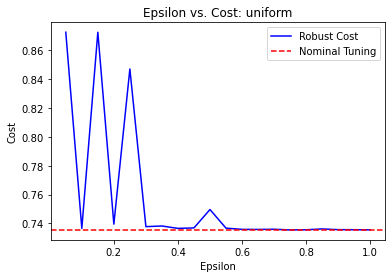

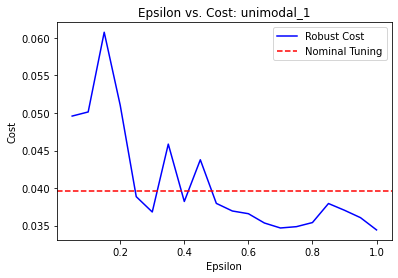

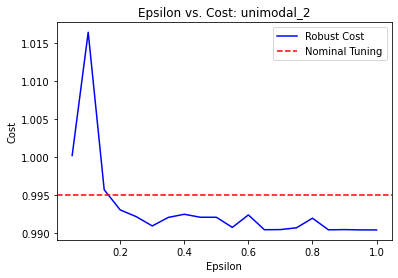

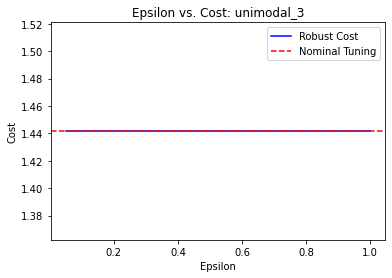

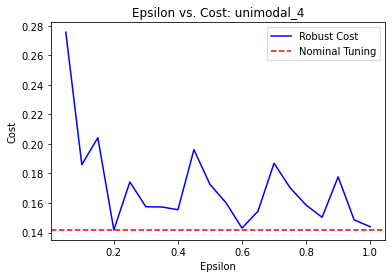

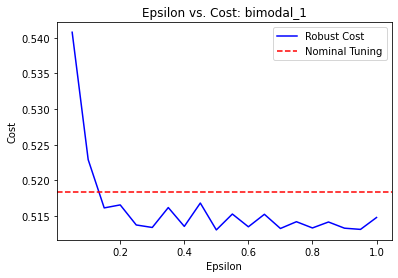

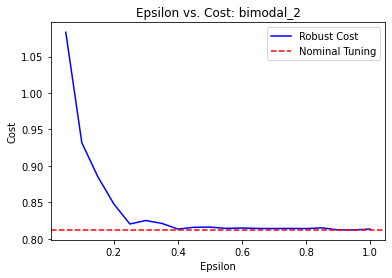

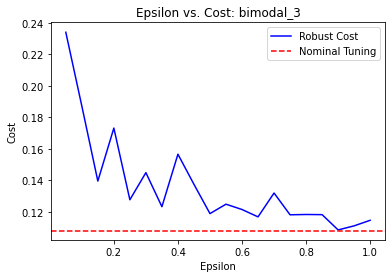

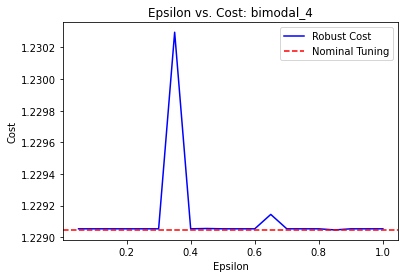

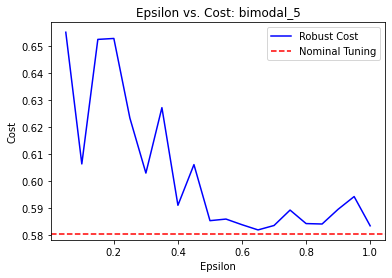

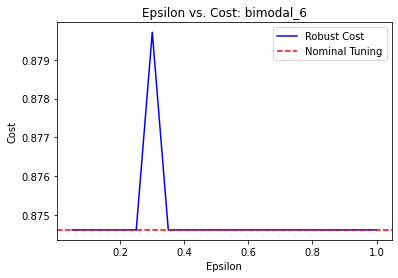

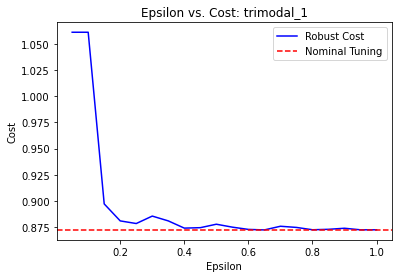

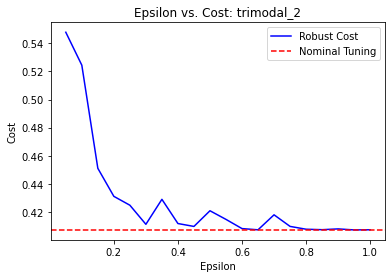

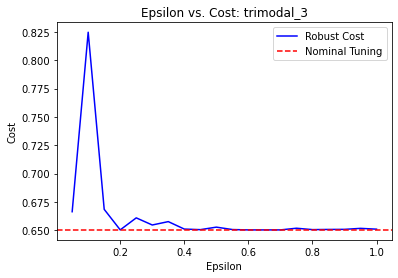

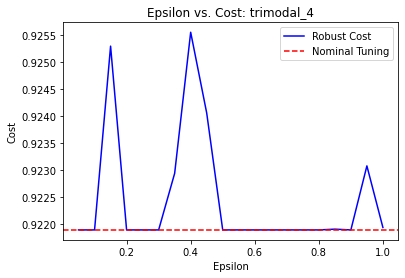

In [5]:
for i in range(len(files)): 
    df = pd.read_csv(files[i])
    df["Robust Cost"] = df["Robust Cost"].round(6)
    plt.plot(df["Epsilon"].to_numpy(), df["Robust Cost"].to_numpy(), color='blue', label="Robust Cost")
    plt.axhline(y=df["Nominal Cost"].iloc[0], color="red", linestyle="--", label="Nominal Tuning")
    plt.xlabel("Epsilon")
    plt.ylabel("Cost")
    plt.legend()
    name = "Epsilon vs. Cost: " + files[i].split(".")[0]
    plt.title(name)
    plt.show()

The lower than nominal costs in `unimodal_1` and `unimodal_2` and `bimodal_1` cannot be caused by numpy overflow because I have excluded those results from the best cost considerations. 

### Avg Expected Rho
- Generate 1 perturbed workload as the input to Endure 
- Generate 10 other perturbed workloads to find the average KL distance as the input for Rho 
- Robust tuning is best out of 100

In [6]:
os.chdir(HOME_DIR)
os.chdir("../experiment_results/rho_multiples_OLD") 
files = ['uniform.csv', 
         'unimodal_1.csv', 'unimodal_2.csv', 'unimodal_3.csv', 'unimodal_4.csv', 
         'bimodal_1.csv', 'bimodal_2.csv', 'bimodal_3.csv', 'bimodal_4.csv', 'bimodal_5.csv', 'bimodal_6.csv',
         'trimodal_1.csv', 'trimodal_2.csv', 'trimodal_3.csv', 'trimodal_4.csv'
        ]

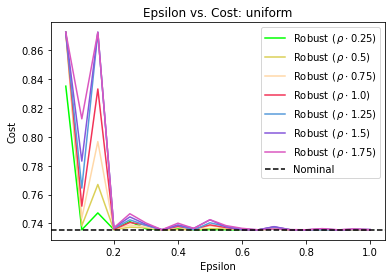

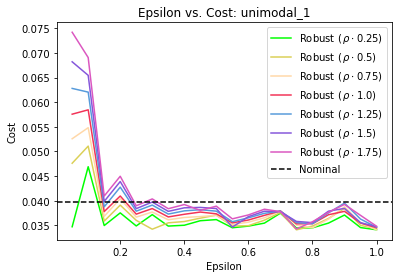

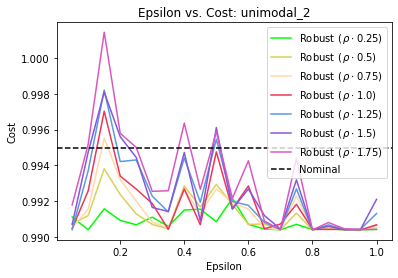

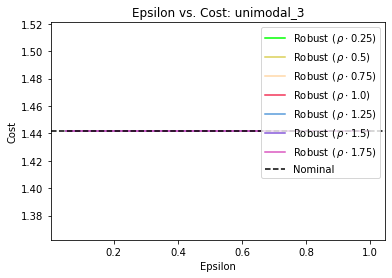

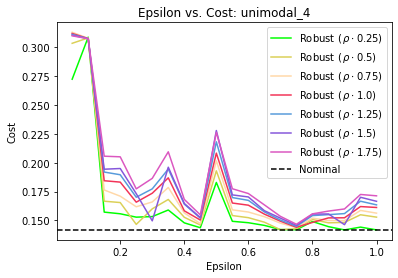

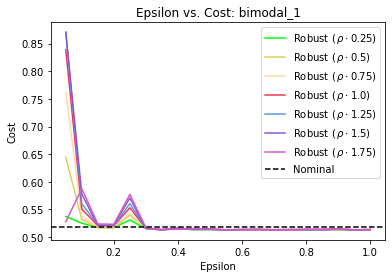

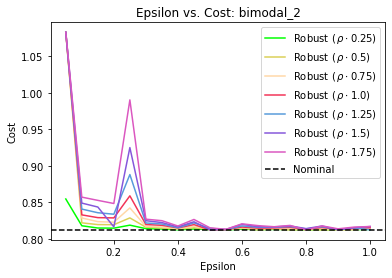

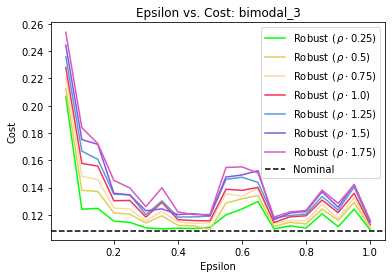

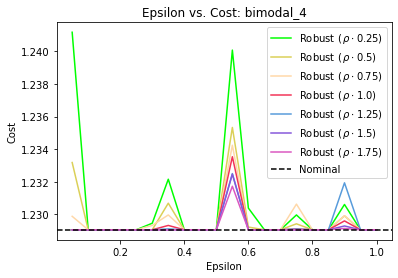

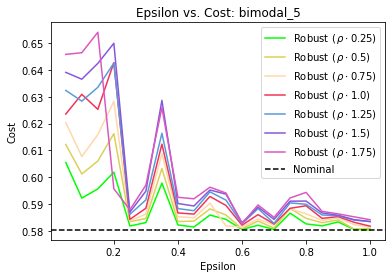

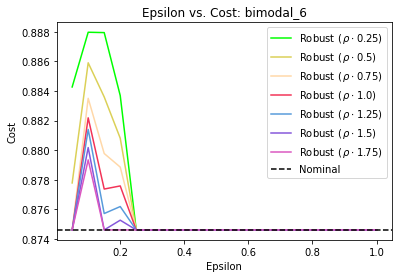

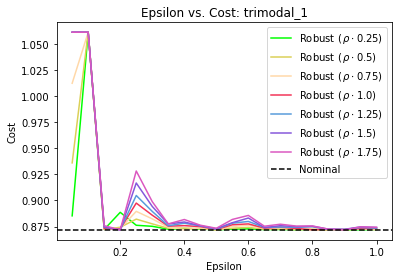

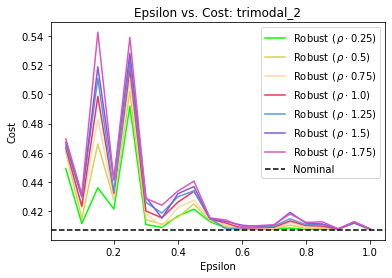

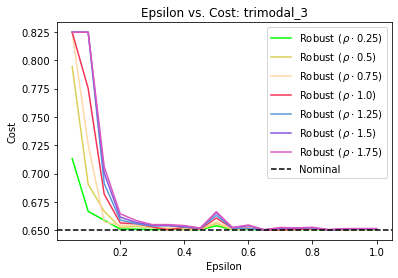

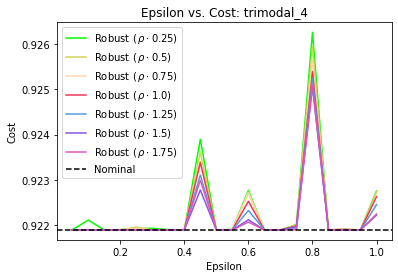

In [7]:
palette = sns.color_palette("hls", 7)
palette[3] = (0.95, 0.2, 0.34)
palette[0] = (0.0, 1.0, 0.0)
palette[2] = (1.0, 0.847, 0.659)

for i in range(len(files)): 
    df = pd.read_csv(files[i])
    for j, (key, grp) in enumerate(df.groupby('Rho Multiplier')):
        plt.plot(grp['Epsilon'].to_numpy().round(6), grp['Robust Cost'].to_numpy().round(6), label=rf'Robust ($\,\rho \cdot ${key})', color=palette[j])
    
    plt.axhline(y=df["Nominal Cost"].iloc[0], color='black', linestyle="--", label="Nominal")
    plt.xlabel('Epsilon')
    plt.ylabel('Cost')
    plt.title('Epsilon vs. Cost')
    plt.legend()    
    name = "Epsilon vs. Cost: " + files[i].split(".")[0]
    plt.title(name)
    plt.show()
    


In [8]:
df = pd.read_csv('bimodal_4.csv')
df

,Epsilon,Robust Cost,Nominal Cost,Rho (Expected),Rho Multiplier,Rho (True)
0,0.05,1.241178,1.229044,0.983517,0.25,0.689000
1,0.05,1.233182,1.229044,0.983517,0.50,0.689000
2,0.05,1.229879,1.229044,0.983517,0.75,0.689000
3,0.05,1.229045,1.229044,0.983517,1.00,0.689000
4,0.05,1.229053,1.229044,0.983517,1.25,0.689000
...,...,...,...,...,...,...
135,1.00,1.229048,1.229044,0.010949,0.75,0.000014
136,1.00,1.229053,1.229044,0.010949,1.00,0.000014
137,1.00,1.229049,1.229044,0.010949,1.25,0.000014
138,1.00,1.229053,1.229044,0.010949,1.50,0.000014


Visualization of the workload itself with this plots. So we can show how the neighborhood affects the ordering of $\rho$. 
- $z_0 + z_1 + q + \mu = 1$
- Plot 3 and color gradient is the fourth

Other idea: combine $z_0 + z_1$, q, $\mu$


Plot the original workload + all the different epsilon workloads. 

Fixing variables to find different trends

3D plots with rho, epsilon, costs

Log the workloads 

Run each trial 3-5 times (run it on one experiment, if the error bars are really small, no need to run too many)

Plot percentages

In [9]:
os.chdir(HOME_DIR)
os.chdir("../experiment_results/rho_multiples") 
files = [#'uniform.csv', 
         #'unimodal_1.csv', 'unimodal_2.csv', 'unimodal_3.csv', 'unimodal_4.csv', 
         #'bimodal_1.csv', 'bimodal_2.csv', 'bimodal_3.csv', 'bimodal_4.csv', 'bimodal_5.csv', 'bimodal_6.csv',
         'trimodal_1.csv', 'trimodal_2.csv', 'trimodal_3.csv', 'trimodal_4.csv'
        ]

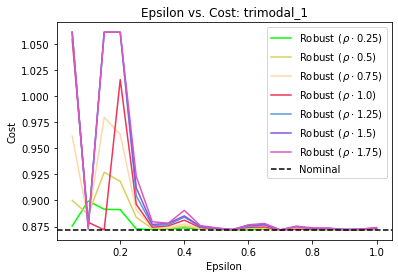

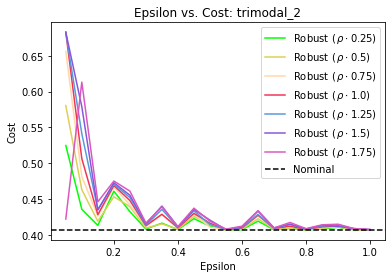

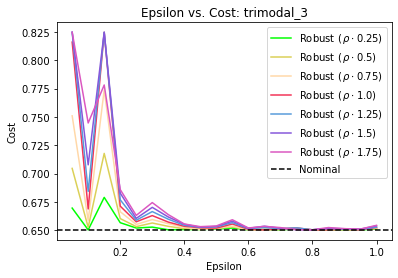

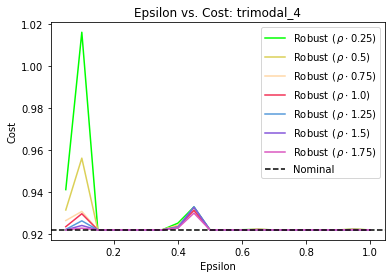

In [10]:
palette = sns.color_palette("hls", 7)
palette[3] = (0.95, 0.2, 0.34)
palette[0] = (0.0, 1.0, 0.0)
palette[2] = (1.0, 0.847, 0.659)

for i in range(len(files)): 
    df = pd.read_csv(files[i])
    for j, (key, grp) in enumerate(df.groupby('Rho Multiplier')):
        plt.plot(grp['Epsilon'].to_numpy().round(6), grp['Robust Cost'].to_numpy().round(6), label=rf'Robust ($\,\rho \cdot ${key})', color=palette[j])
    
    plt.axhline(y=df["Nominal Cost"].iloc[0], color='black', linestyle="--", label="Nominal")
    plt.xlabel('Epsilon')
    plt.ylabel('Cost')
    plt.title('Epsilon vs. Cost')
    plt.legend()    
    name = "Epsilon vs. Cost: " + files[i].split(".")[0]
    plt.title(name)
    plt.show()

To do: 
- tests with rho that doesn't depend on anything range(0, 2, 0.1)
- fix current graphs (nominal lines)
- see how error bars look
- workload plots